In [159]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [142]:
def generate_dna_sequences(n: int): 
    return np.array(["".join(x) for x in list(itertools.product('ACTG', repeat=n))])

def one_hot_encode_dna_sequences(lst):
    mp = {
        "A" : [1, 0, 0, 0], 
        "C" : [0, 1, 0, 0], 
        "T" : [0, 0, 1, 0], 
        "G" : [0, 0, 0, 1]
    }
    return np.array([[mp[i] for i in string] for string in lst])

def one_hot_encode_flat_dna_sequences(lst):
    mp = {
        "A" : [1, 0, 0, 0], 
        "C" : [0, 1, 0, 0], 
        "T" : [0, 0, 1, 0], 
        "G" : [0, 0, 0, 1]
    }
    return np.array([np.array([mp[i] for i in string]).flatten() for string in lst])

def generate_output(lst, dna_seq_length, add_bias=False, add_nonlinearity=False, layers = []):
    input_size = dna_seq_length;
    state = lst
    for hidden_size in layers:
        W = np.random.randn(input_size, hidden_size)
        if add_bias:
            b = np.random.randn(1)
        else: 
            b = np.zeros(1)
        state = np.matmul(state, W) + b 
        if add_nonlinearity: 
            state = sigmoid(state)
        input_size = hidden_size 
    W = np.random.randn(input_size, 1)
    if add_bias:
        b = np.random.randn(1)
    else: 
        b = np.zeros(1)
    output = np.matmul(state, W) + b
    if add_nonlinearity:
        return sigmoid(output)
    else: 
        return output 

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def normalize(x): 
    return (x - np.mean(x)) / np.std(x)

def get_sorted_outputs(inputs, outputs): 
    return sorted(list(zip(inputs, outputs)), key = lambda x: x[1], reverse=True)

In [154]:
length = 4
dna_sequences = generate_dna_sequences(length)
inputs = one_hot_encode_flat_dna_sequences(dna_sequences)
outputs = normalize(generate_output(inputs, 4 * n, add_bias=True, add_nonlinearity=False, layers=[20, 50]))
sorted_outputs = get_sorted_outputs(dna_sequences, outputs)

In [155]:
sorted_outputs

[('TACG', array([2.53278387])),
 ('AACG', array([2.25600324])),
 ('GACG', array([2.25166019])),
 ('TACA', array([2.2099057])),
 ('TACC', array([2.1168938])),
 ('CACG', array([2.01717598])),
 ('TCCG', array([1.99513688])),
 ('AACA', array([1.93312507])),
 ('GACA', array([1.92878202])),
 ('TTCG', array([1.92308561])),
 ('AACC', array([1.84011317])),
 ('GACC', array([1.83577013])),
 ('ACCG', array([1.71835625])),
 ('GCCG', array([1.7140132])),
 ('CACA', array([1.69429781])),
 ('TCCA', array([1.6722587])),
 ('ATCG', array([1.64630498])),
 ('GTCG', array([1.64196194])),
 ('CACC', array([1.60128592])),
 ('TTCA', array([1.60020744])),
 ('TCCC', array([1.57924681])),
 ('TACT', array([1.53040855])),
 ('TTCC', array([1.50719554])),
 ('TAAG', array([1.49092147])),
 ('CCCG', array([1.47952899])),
 ('CTCG', array([1.40747772])),
 ('ACCA', array([1.39547807])),
 ('GCCA', array([1.39113503])),
 ('ATCA', array([1.32342681])),
 ('GTCA', array([1.31908376])),
 ('ACCC', array([1.30246618])),
 ('GCCC', ar

In [156]:
def reshape_square(outputs): 
    return outputs.reshape(int(np.sqrt(len(outputs))), int(np.sqrt(len(outputs))))

In [157]:
def visualize(outputs, dna_sequences):
    plt.figure(figsize=(20,20))
    plt.title('DNA Sequence HeatMap', size=20)
    data, labels = reshape_square(outputs), reshape_square(dna_sequences)
    sns.heatmap(data, annot=labels, fmt='', xticklabels=False, yticklabels=False)
    plt.show()

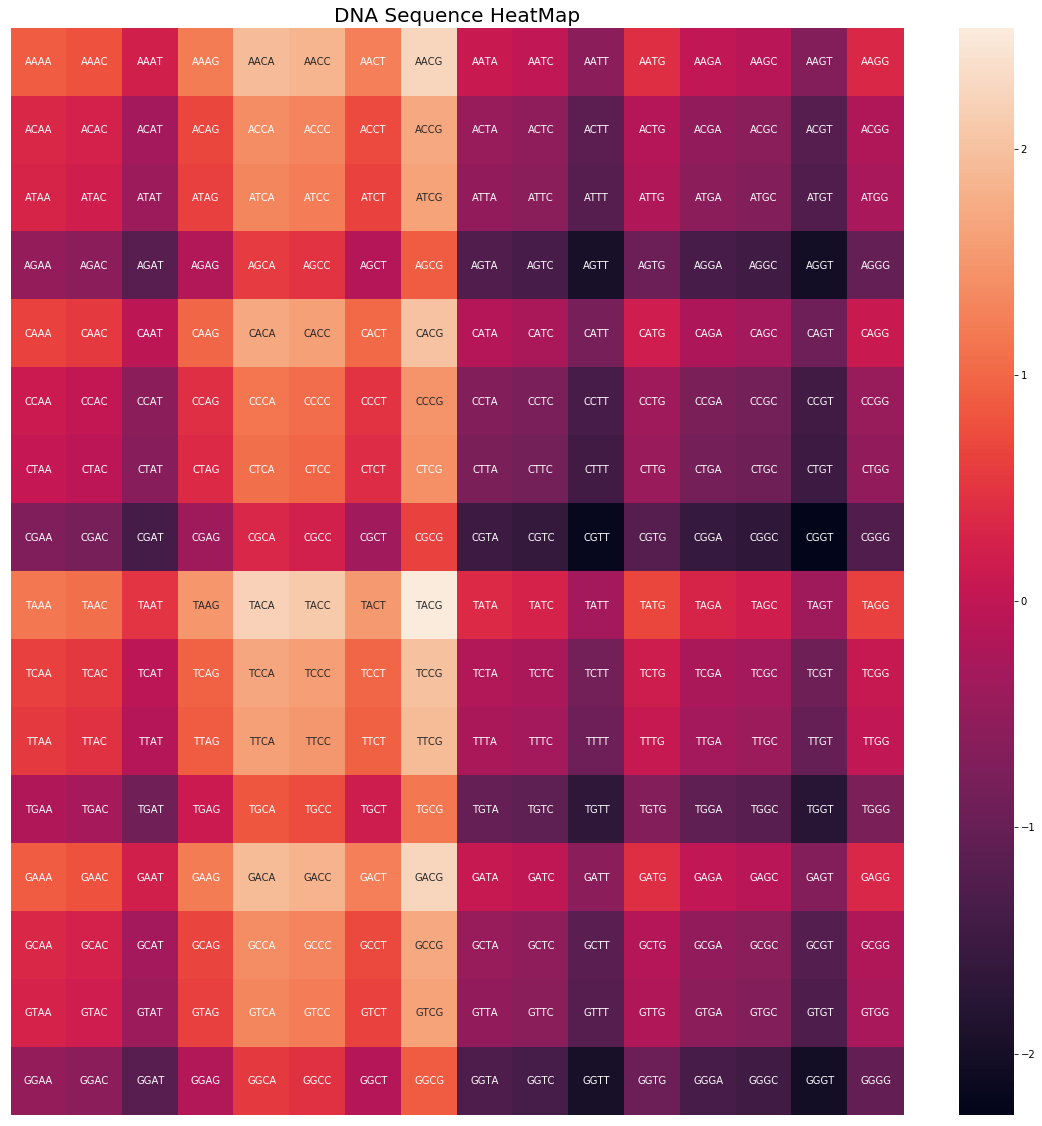

In [158]:
visualize(outputs, dna_sequences)

In [ ]:
## do it on paper
## gdp, dnn code 